# <b>ENGR 418 Project Stage 1</b>

<b>Group 7 <br>
Group Members:</b> <br>
Alif Aiman Ahmad Zukiman | 35338490 <br>
Anas Chellabi | 86925930

_October 30, 2023_

## Problem Description
We are to classify a Lego dataset into four different classes: 2x4 rectangles, 2x2 squares, 2x2 circles, and 2x1 rectangles. The classified Legos are then sorted according to their predicted classes. This will be done via the multi-class classification algorithm, as presented below.

### 1. Extracting Data

Import necessary libraries:

In [1]:
import os                                                       # for recognising path directories
import numpy as np  
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression             # algorithm to be used
from sklearn.metrics import confusion_matrix, accuracy_score    # accuracy testing
from PIL import Image                                           # image processor
import random                                        

User-defined Paths:

In [2]:
# dataset file path for Alif
training_path = "E:\\EDU UBC\\Assignments\\ENGR 418 (MCHL)\\Lego_dataset_1\\training\\" 
testing_path = "E:\\EDU UBC\\Assignments\\ENGR 418 (MCHL)\\Lego_dataset_1\\testing\\"

# dataset file path for Anas
# training_path = "e:\\418 dataset\\Lego_dataset_1\\training\\" 
# testing_path = "e:\\418 dataset\\Lego_dataset_1\\testing\\"

Assign arrays of training and testing by redirecting the arrays to the specified paths:

In [3]:
n_classes = 4   # no. of classes

# create empty lists for four classes
folder_training = []

# detect how many files we have per class
# class 0:"2b1", class 1:"cir", class 2:"rec", class 3:"squ"
classes = [i for i in range(n_classes)]
class_type = ["2b1", "cir", "rec", "squ"]

# routine for storing folder_training with paths for each image
for i in range(len(class_type)):

    class_temp = [] # list to temporarily store class in consideration

    # run through the entire training dataset and detect if it is of the same type as
    # one we are considering. if true, then put into class_temp
    for j in os.listdir(training_path):
        if class_type[i] in j:
            class_temp.append(j)
    
    folder_training.append(class_temp)

for i in range(len(folder_training)):
    for j in range(len(folder_training[i])):
        folder_elem = folder_training[i][j]
        folder_training[i][j] = training_path + folder_elem

# print(folder_training)


Define a function "get_data" to retrieve information about the chosen images:

In [4]:
def get_data(folder, im_width, label, n_samples):

    # x,y coordinates for storing the image pixels
    x = np.empty((n_samples, im_width**2))
    y = np.empty((n_samples, 1))

    # extract image information into x,y
    for i in range(n_samples):
        path = folder[i]
        im = Image.open(path).convert('L')  # open image and convert to grayscale
        im = im.resize((im_width,im_width)) # resize to pixel size desired
        im_array = asarray(im)
        x[i,:] = im_array.reshape(1,-1)
        y[i,0] = classes[label]

    return x,y

### 2. Parameter Initialization and Training Data Preparation

In [5]:
im_width = 64   # pixel size to be considered
P_per_class = [len(folder_training[i]) for i in range(n_classes)]
x_train = np.empty((sum(P_per_class), im_width**2))
y_train = np.empty((sum(P_per_class), 1))

for i in range(n_classes):
    x_i, y_i = get_data(folder_training[i], im_width, i, P_per_class[i])
    x_train[i*P_per_class[i] : (i+1)*P_per_class[i],:] = x_i
    y_train[i*P_per_class[i] : (i+1)*P_per_class[i],:] = y_i

print(x_train.shape, y_train.shape)


(144, 4096) (144, 1)


Check to see if the get_data function was working properly:

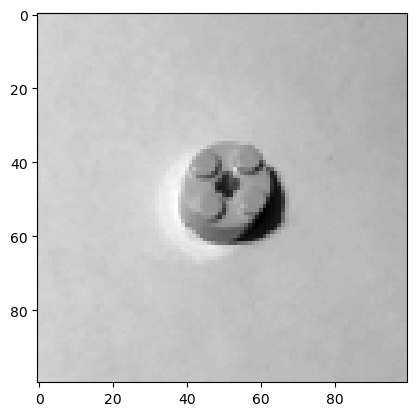

In [6]:
i_check = random.randrange(n_classes)
j_check = random.randrange(P_per_class[i_check])
res_check = 100

x_check, y_check = get_data(folder_training[i_check], res_check, i_check, P_per_class[i_check])
plt.imshow(x_check[j_check,:].reshape(res_check,res_check), cmap = 'gray')
plt.show()

### 3. Model Training

In [7]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train,y_train.ravel())

LogisticRegression(max_iter=1000)

### 4. Model Testing

Define function "test_function":

In [8]:
def test_function(path):

    # store array of directories to each image sorted to their defined classes in the path
    folder_path = []

    for i in range(len(class_type)):

        class_temp = []

        for j in os.listdir(path):
            if class_type[i] in j:
                class_temp.append(j)
                
        folder_path.append(class_temp)

    for i in range(len(folder_path)):
        for j in range(len(folder_path[i])):
            folder_elem = folder_path[i][j]
            folder_path[i][j] = path + folder_elem

    # prepare data for testing
    P_per_class = [len(folder_path[i]) for i in range(n_classes)]
    x_test = np.empty((sum(P_per_class), im_width**2))
    y_test = np.empty((sum(P_per_class), 1))

    for i in range(n_classes):
        x_i, y_i = get_data(folder_path[i], im_width, i, P_per_class[i])
        x_test[i*P_per_class[i]:(i+1)*P_per_class[i],:] = x_i
        y_test[i*P_per_class[i]:(i+1)*P_per_class[i],:] = y_i

    # test model
    y_pred = model.predict(x_test)
    print(f"Confusion matrix: \n{confusion_matrix(y_test,y_pred)}")
    print(f"Accuracy score: {accuracy_score(y_test,y_pred):.3f}")


    

The testing function is now ready to be used for variable paths. If we use the same testing dataset as our training dataset, we will obviously obtain an accuracy score of 1.0, since all of the data samples fit perfectly to our trained weights:

In [9]:
path = training_path
test_function(path)

Confusion matrix: 
[[36  0  0  0]
 [ 0 36  0  0]
 [ 0  0 36  0]
 [ 0  0  0 36]]
Accuracy score: 1.000


Testing this on our testing folder, we obtain the following:

In [10]:
path = testing_path
test_function(path)

Confusion matrix: 
[[18  0  0  0]
 [ 0 16  0  2]
 [ 0  0 16  2]
 [ 0  1  0 17]]
Accuracy score: 0.931


We test the algorithm on a different dataset, chosen in random between the two established training and testing folders. Since they are selected randomly, the sample size per class will also vary. <br>

<b>NOTE:</b> Running the cell below for the first time might output errors unbeknownst to us. Our best guess is because the sample size per class is not equal and that raises some issues. If this happens on your end, please rerun the cell once or twice. Eventually it will return a non-error output. 

In [12]:
# note: running this cell for the first time might return an error, and we are not sure why.
# if the same happens, rerun the cell and that should give a non-error output

path = "E:\\EDU UBC\\Assignments\\ENGR 418 (MCHL)\\Lego_dataset_1\\testing_2\\"
test_function(path)

Confusion matrix: 
[[12  0  0  0]
 [ 0  6  0  0]
 [ 0  0  5  1]
 [ 0  0  0 22]]
Accuracy score: 0.978


If we instead make another testing folder but in this case all of the sample sizes are equal, the above issue did not get raised:

In [ ]:
path = "E:\\EDU UBC\\Assignments\\ENGR 418 (MCHL)\\Lego_dataset_1\\testing_3\\"
test_function(path)

Confusion matrix: 
[[10  0  0  0]
 [ 0  9  0  1]
 [ 0  0 10  0]
 [ 0  0  0 10]]
Accuracy score: 0.975
